The dataset comprises comprehensive records of traffic collisions in New York City, capturing key details such as the date, time, location (borough and street), contributing factors, and the number of persons injured or killed in each accident. It allows for analysis of temporal patterns, including monthly, daily, and hourly trends, and spatial patterns, highlighting streets or boroughs with higher accident occurrences. Additionally, the dataset provides insights into the most common contributing factors, helping identify potential causes of accidents and enabling targeted safety measures. Overall, this data serves as a valuable resource for understanding traffic risks, planning interventions, and improving road safety in NYC.

This imports the pandas library, loads the data from the google drive into the colab to be able to display the first five rows of the dataset

In [24]:
import pandas as pd

# Google Sheet ID from your link
sheet_id = "1G4ehuqm-7e9sRzRg1GRAD-BdGtP3i3NxnuuJ3RpuAdw"

# URL to download as CSV
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

# Load into a DataFrame
df = pd.read_csv(csv_url)

# Show first rows
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,5:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,6:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,7:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


This code examines the dataset’s structure, quality, provides summary statistics for numerical columns and also identifies missing values in each columns.

In [25]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

,0
Collision ID,0
Date,0
Time,0
Borough,7197
Street Name,363
Cross Street,127130
Latitude,22323
Longitude,22323
Contributing Factor,1287
Vehicle Type,0


This displays the list of all column names in the dataset.

In [26]:
df.columns


Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed'],
      dtype='object')

This code cleans the dataset by removing spaces from the column names

---



In [27]:
# Remove possible spaces
df.columns = df.columns.str.strip()

# Convert Time column
df['time_only'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df.head()


,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,time_only
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1900-01-01 20:00:00
1,4441905,2021-01-01,5:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1900-01-01 05:28:00
2,4382769,2021-01-01,6:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1900-01-01 06:00:00
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0,1900-01-01 19:30:00
4,4380940,2021-01-01,7:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1900-01-01 07:40:00


This code creates new columns by extracting the month and day of the week from the Date column, as well as the hour, minutes, and seconds from the time_only column, then displays the first five rows of the updated dataset.

In [28]:
import pandas as pd

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check
df['Date'].dtype

dtype('<M8[ns]')

In [29]:
# Create new columns
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = df['time_only'].dt.hour
df['Minutes'] = df['time_only'].dt.minute
df['Seconds'] = df['time_only'].dt.second
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,time_only,Month,Day_of_Week,Hour,Minutes,Seconds
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,...,0,0,0,0,1900-01-01 20:00:00,1,Friday,20,0,0
1,4441905,2021-01-01,5:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,...,0,0,0,0,1900-01-01 05:28:00,1,Friday,5,28,0
2,4382769,2021-01-01,6:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,...,0,0,0,0,1900-01-01 06:00:00,1,Friday,6,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,...,0,0,0,0,1900-01-01 19:30:00,1,Friday,19,30,0
4,4380940,2021-01-01,7:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,...,0,0,0,0,1900-01-01 07:40:00,1,Friday,7,40,0


This provides a concise summary of the DataFrame, including the column names, data types, non-null counts, and overall memory usage.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  datetime64[ns]
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-null  float64       
 7   Longitude            216098 non-null  float64       
 8   Contributing Factor  237134 non-null  object        
 9   Vehicle Type         238421 non-null  object        
 10  Persons Injured      238420 non-null  float64       
 11  Persons Killed       238421 non-null  int64         
 12  Pedestrians Injured  238421 non-null  int64         
 13  Pedestrians Ki

This code calculates the number of records for each month, sorts them in calendar order, computes their percentage relative to the total dataset, and displays the monthly percentage distribution.

In [31]:
monthly_counts = df['Month'].value_counts().sort_index()
monthly_percentage = (monthly_counts / len(df)) * 100

monthly_percentage


,count
Month,
1,9.656867
2,8.894770
3,10.527177
4,8.044593
5,8.283247
6,8.421657
7,7.915410
8,7.885631
9,7.873048


This code creates a bar chart showing the percentage of accidents for each month.

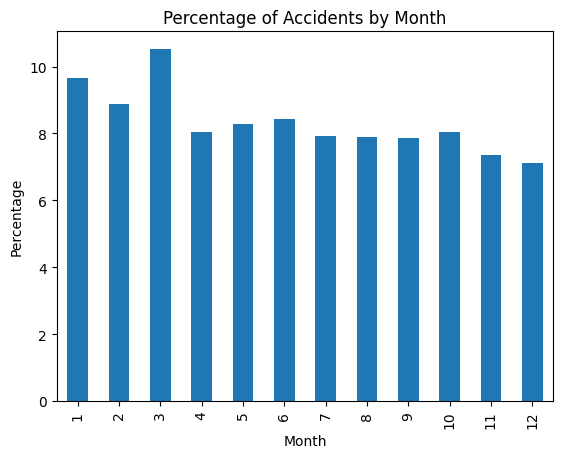

In [32]:
import matplotlib.pyplot as plt

monthly_percentage.plot(kind='bar')
plt.title('Percentage of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.show()


This code counts the number of accidents for each day of the week and displays the results.

In [33]:
day_counts=df['Day_of_Week'].value_counts()
day_counts


,count
Day_of_Week,
Friday,37496
Thursday,34645
Wednesday,34053
Saturday,34037
Tuesday,33656
Monday,33333
Sunday,31201


This code creates a bar chart showing the number of accidents for each day of the week.

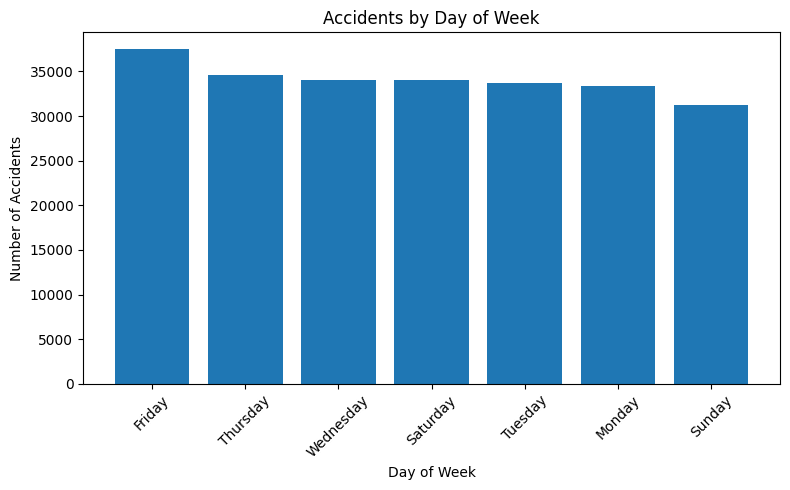

In [34]:
plt.figure(figsize=(8,5))
plt.bar(day_counts.index, day_counts.values)

plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


This code identifies the street with the highest number of accidents, calculates what percentage of the total accidents occurred there, and prints the street name along with the percentage.

In [35]:
street_counts = df['Street Name'].value_counts()

top_street = street_counts.idxmax()
top_count = street_counts.max()

percentage = (top_count / len(df)) * 100

print("Top Street:", top_street)
print("Percentage of Total Accidents:", round(percentage,2), "%")


Top Street: Belt Parkway
Percentage of Total Accidents: 1.56 %


This code displays the top five most frequent contributing factors to accidents in the dataset.

In [36]:
df['Contributing Factor'].value_counts().head()


,count
Contributing Factor,
Driver Inattention/Distraction,58308
Unspecified,58262
Failure to Yield Right-of-Way,16555
Following Too Closely,15519
Passing or Lane Usage Improper,10733


This code creates a bar chart of the top five contributing factors to accidents

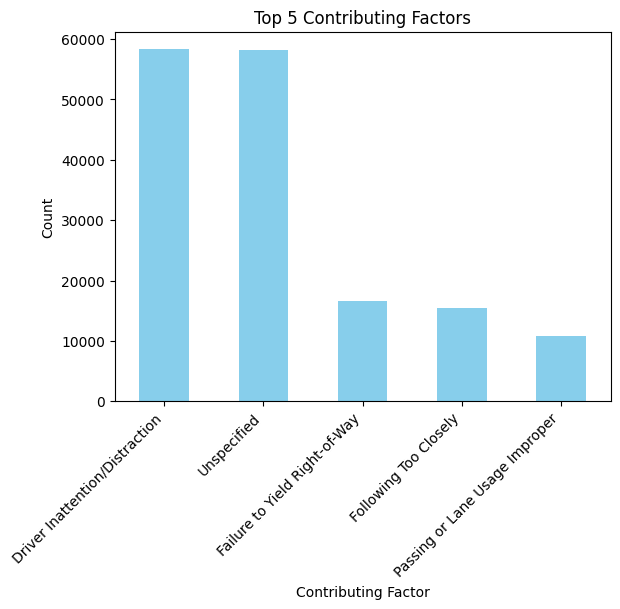

In [37]:
top_factors = df['Contributing Factor'].value_counts().head()

# Plot
top_factors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

This include only accidents where at least one person was killed and then displays the top five contributing factors for these fatal accidents.

In [38]:
fatal_df = df[df['Persons Killed'] > 0]

fatal_df['Contributing Factor'].value_counts().head()


,count
Contributing Factor,
Unspecified,175
Unsafe Speed,130
Driver Inattention/Distraction,74
Failure to Yield Right-of-Way,46
Traffic Control Disregarded,33


Top Five Contributing Factors of the Accidents

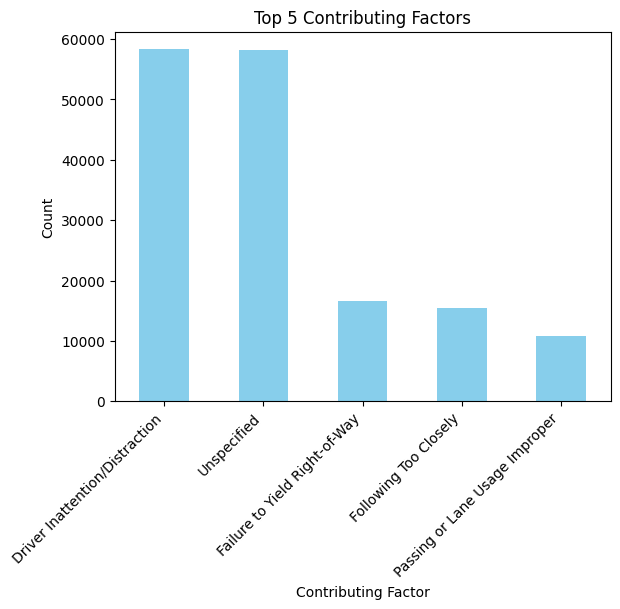

In [39]:
top_factors = df['Contributing Factor'].value_counts().head()

# Plot
top_factors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Counts the Number of Accidents in each Borough

In [40]:
borough_counts = df['Borough'].value_counts()
df['Borough'].value_counts()

,count
Borough,
Brooklyn,76416
Queens,63751
Bronx,41255
Manhattan,38234
Staten Island,11568


Dsiplay the number of Incidents by Borough in a bar graph

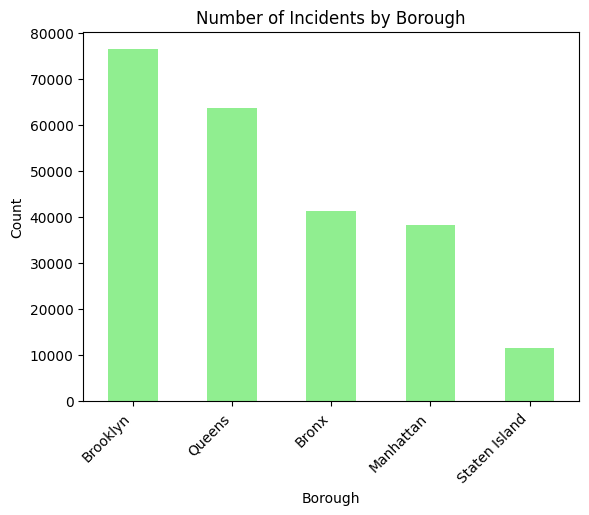

In [41]:
borough_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Calcualates the total number of people injured and the number of people killed.

In [42]:
df[['Persons Injured', 'Persons Killed']].sum()


,0
Persons Injured,116226.0
Persons Killed,635.0


Display the total number of mpeople injured as against the number of people killed

Persons Injured    116226.0
Persons Killed        635.0
dtype: float64


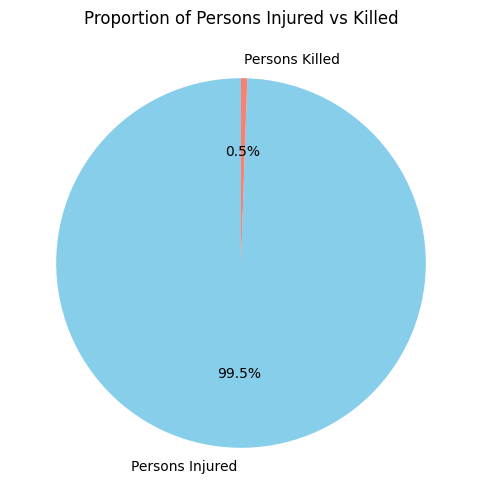

In [43]:
# Sum the columns
totals = df[['Persons Injured', 'Persons Killed']].sum()
print(totals)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proportion of Persons Injured vs Killed')
plt.show()

This creates a new column, hour_interval, by grouping the Hour values into 6 time intervals (0–4, 5–8, etc.), and then displays the first five rows

In [44]:

# Define bins and labels
bins = [0, 4, 8, 12, 16, 20, 24]  # 0-4, 5-8, 9-12, etc.
labels = ['0-4', '5-8', '9-12', '13-16', '17-20', '21-24']

# Create interval column
df['hour_interval'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=True, include_lowest=True)

df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,...,Cyclists Killed,Motorists Injured,Motorists Killed,time_only,Month,Day_of_Week,Hour,Minutes,Seconds,hour_interval
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,...,0,0,0,1900-01-01 20:00:00,1,Friday,20,0,0,17-20
1,4441905,2021-01-01,5:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,...,0,0,0,1900-01-01 05:28:00,1,Friday,5,28,0,5-8
2,4382769,2021-01-01,6:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,...,0,0,0,1900-01-01 06:00:00,1,Friday,6,0,0,5-8
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,...,0,0,0,1900-01-01 19:30:00,1,Friday,19,30,0,17-20
4,4380940,2021-01-01,7:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,...,0,0,0,1900-01-01 07:40:00,1,Friday,7,40,0,5-8


This removes rows with missing values in the Day_of_Week or Hour columns, then creates a pivot table showing the number of accidents for each combination of day of the week and hourly interval.

In [45]:
heat_df = df.dropna(subset=['Day_of_Week', 'Hour'])

pivot_table =  df.pivot_table(
    index='Day_of_Week',
    columns='hour_interval',
    aggfunc='size',
    fill_value=0
)

pivot_table

/tmp/ipython-input-1817325174.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table =  df.pivot_table(


hour_interval,0-4,5-8,9-12,13-16,17-20,21-24
Day_of_Week,,,,,,
Friday,3888,4854,7021,8920,8197,4616
Monday,3849,5045,6537,7938,6857,3107
Saturday,6483,3495,5545,7033,6921,4560
Sunday,6989,3202,4591,6380,6169,3870
Thursday,3194,4869,6877,8431,7685,3589
Tuesday,2740,4995,6852,8396,7346,3327
Wednesday,2919,4949,6751,8577,7422,3435


This reorders the pivot table rows to follow the natural order of the days of the week from Monday to Sunday.

In [46]:
days_order = ['Monday','Tuesday','Wednesday','Thursday',
              'Friday','Saturday','Sunday']

pivot_table = pivot_table.reindex(days_order)


In [47]:
pivot_table

hour_interval,0-4,5-8,9-12,13-16,17-20,21-24
Day_of_Week,,,,,,
Monday,3849,5045,6537,7938,6857,3107
Tuesday,2740,4995,6852,8396,7346,3327
Wednesday,2919,4949,6751,8577,7422,3435
Thursday,3194,4869,6877,8431,7685,3589
Friday,3888,4854,7021,8920,8197,4616
Saturday,6483,3495,5545,7033,6921,4560
Sunday,6989,3202,4591,6380,6169,3870


This code creates a heatmap using Seaborn to visualize accident frequency by day of the week and hourly interval, with annotations, a red color map, and labeled axes and title.

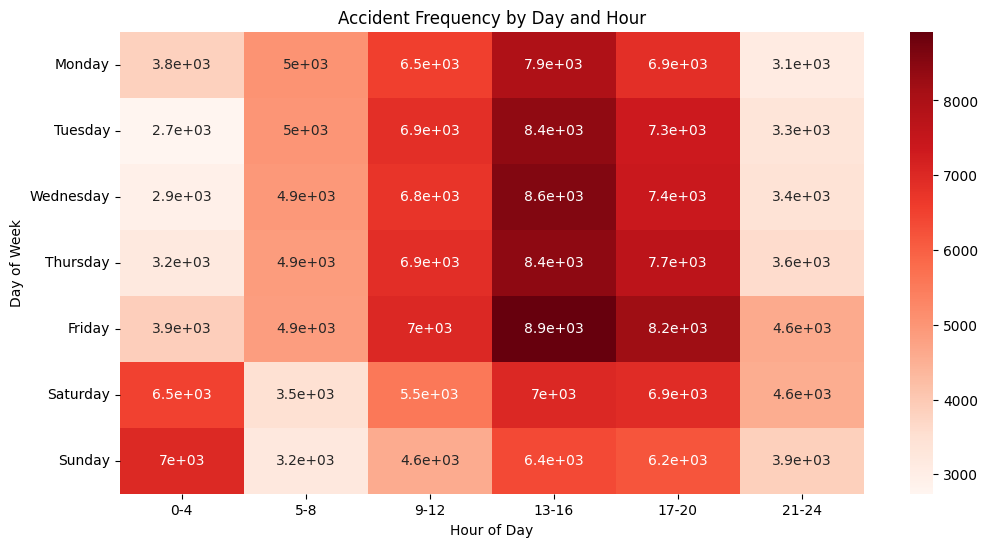

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='Reds',annot=True)

plt.title('Accident Frequency by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()
